In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

train_data_path = '/home/pluto2477/Documents/ML_final_report/data/train_log_processed_final.csv'
test_data_path = '/home/pluto2477/Documents/ML_final_report/data/test_log_processed_final.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

train_df.head()

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,...,Occupation_Self-Employed,Occupation_Unemployed,Occupation_Unknown,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Property Type_Condo,Property Type_House
0,19.0,9.215328,1.0,1,22.598761,1.098612,17.0,372.00000,5.0,0,...,True,False,False,False,True,False,True,False,False,True
1,39.0,10.363409,3.0,2,15.569731,0.693147,12.0,694.00000,2.0,1,...,False,False,True,False,False,True,False,True,False,True
2,23.0,10.150465,3.0,0,47.177549,0.693147,14.0,592.92435,3.0,2,...,True,False,False,True,False,False,True,True,False,True
3,21.0,11.862568,2.0,1,10.938144,0.693147,0.0,367.00000,1.0,0,...,False,False,True,False,False,False,False,True,False,False
4,21.0,10.587897,1.0,1,20.376094,0.000000,8.0,598.00000,4.0,0,...,True,False,False,False,False,False,True,True,False,True


In [2]:
# 훈련데이터에서 검증데이터셋 분리
from sklearn.model_selection import train_test_split

X = train_df.drop('Premium Amount', axis=1)
y = train_df['Premium Amount']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [3]:
# 3. Train Simple XGBRegressor
print("\n[Step 1] Training XGBRegressor with Log-Transformed Inputs...")
model_v4 = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05, 
    n_jobs=-1, 
    random_state=42
)
model_v4.fit(X_train, y_train)




[Step 1] Training XGBRegressor with Log-Transformed Inputs...


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [4]:
# 4. Predict & Evaluate
print("\n[Step 2] Predicting and Evaluating...")
y_pred_log = model_v4.predict(X_val)
y_pred_real = np.expm1(y_pred_log)
y_val_real = np.expm1(y_val)

real_mae = mean_absolute_error(y_val_real, y_pred_real)
real_r2 = r2_score(y_val_real, y_pred_real)

print(f"\nFINAL RESULTS (Single Model + Input Log Transform):")
print(f"MAE: {real_mae:.4f}")
print(f"R2 : {real_r2:.4f}")



[Step 2] Predicting and Evaluating...



FINAL RESULTS (Single Model + Input Log Transform):
MAE: 623.9881
R2 : -0.1483


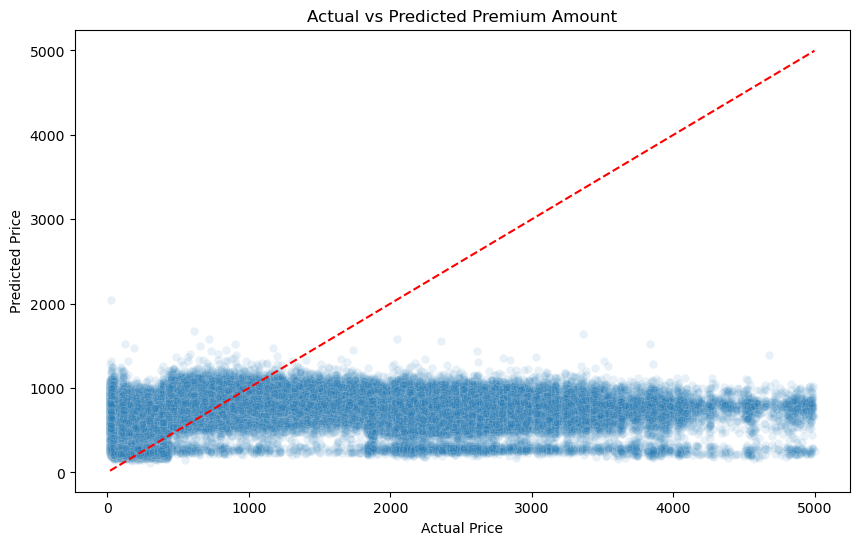

In [5]:
# 변수명이 뭐든 간에 확실한 값으로 다시 정의해서 그리기
import matplotlib.pyplot as plt
import seaborn as sns

# 위에서 계산된 값들
actual = np.expm1(y_val) # y_val은 전역변수로 살아있음
predicted = y_pred_real  # 위 셀에서 생성됨

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual, y=predicted, alpha=0.1)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
plt.title('Actual vs Predicted Premium Amount')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

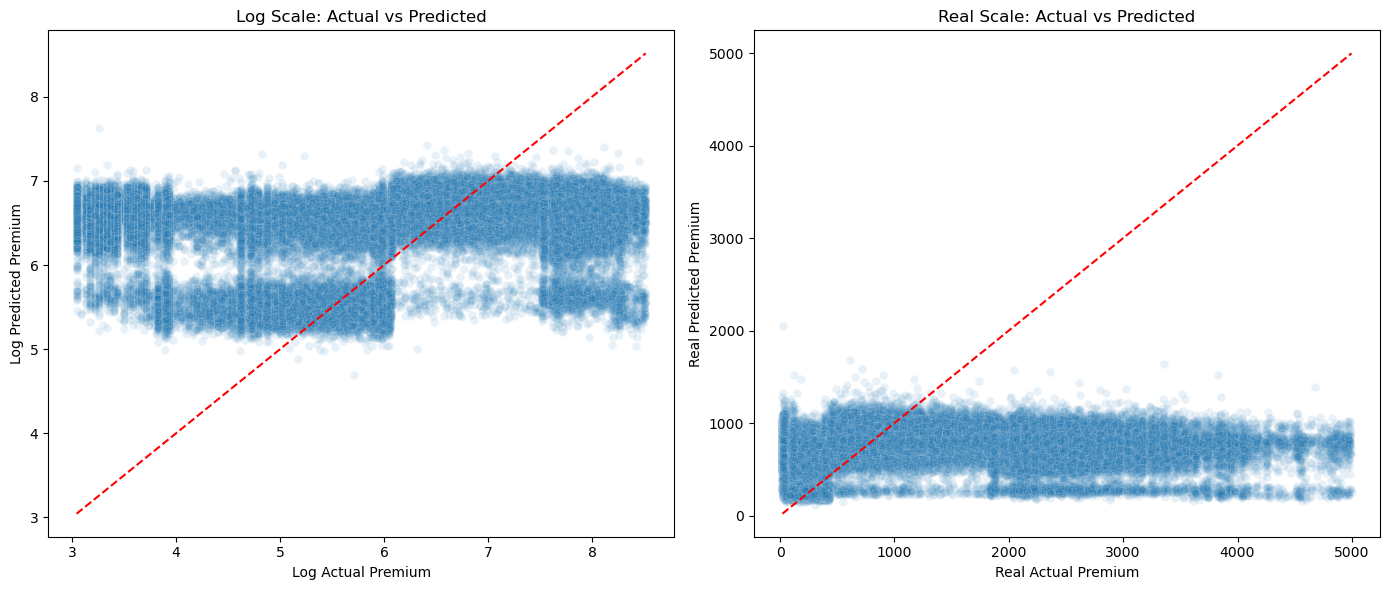

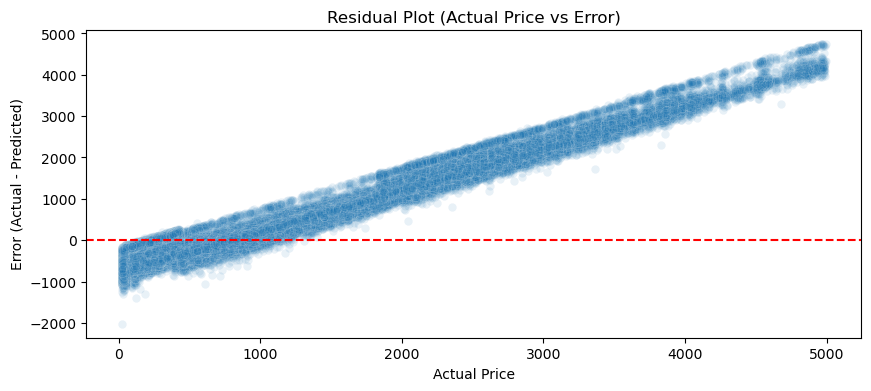

<Figure size 1000x800 with 0 Axes>

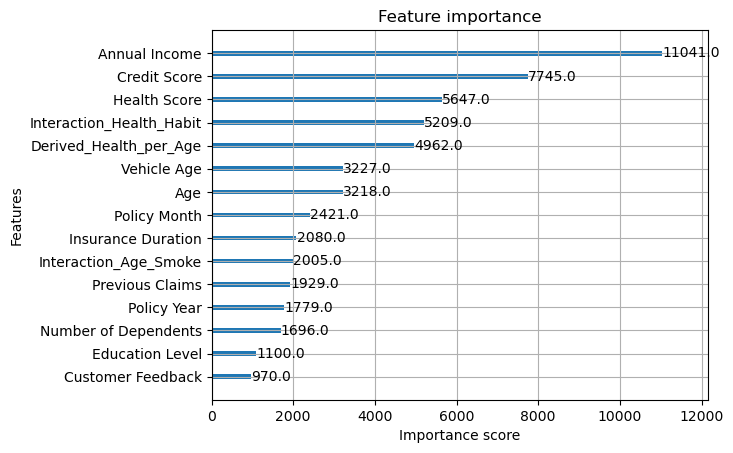

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 실제값 vs 예측값 비교 (로그 스케일 & 실제 스케일)
# y_val, y_pred_log, y_val_real, y_pred_real 변수가 메모리에 있다고 가정
# 만약 없다면, 직전 모델 학습 셀을 다시 실행 후 이 셀을 실행하세요.

plt.figure(figsize=(14, 6))

# A. 로그 스케일 비교 (모델이 보는 세상)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_val, y=y_pred_log, alpha=0.1)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.title('Log Scale: Actual vs Predicted')
plt.xlabel('Log Actual Premium')
plt.ylabel('Log Predicted Premium')

# B. 실제 스케일 비교 (우리가 보는 세상)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val_real, y=y_pred_real, alpha=0.1)
plt.plot([y_val_real.min(), y_val_real.max()], [y_val_real.min(), y_val_real.max()], 'r--')
plt.title('Real Scale: Actual vs Predicted')
plt.xlabel('Real Actual Premium')
plt.ylabel('Real Predicted Premium')

plt.tight_layout()
plt.show()

# 2. 잔차(오차) 분석: 어디서 많이 틀리나?
residuals = y_val_real - y_pred_real
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_val_real, y=residuals, alpha=0.1)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot (Actual Price vs Error)')
plt.xlabel('Actual Price')
plt.ylabel('Error (Actual - Predicted)')
plt.show()

# 3. 중요 변수 확인 (Feature Importance)
from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(model_v4, max_num_features=15) # model_v4는 위에서 학습한 모델 객체
plt.show()

In [7]:
# -------------------------------------------------------------------------
# Final Experiment: Deep Interaction Hunting (Fixed)
# -------------------------------------------------------------------------
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from xgboost import plot_importance

print("\n[Extreme Experiment] Generating Interaction Features & Deep Training...")

# 1. 의심스러운 핵심 변수들 (입력값)
interaction_cols = ['Annual Income', 'Age', 'Health Score', 'Previous Claims', 'Vehicle Age']

# Poly Features 설정
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# DataFrame -> Numpy Array 변환으로 인덱스 문제 원천 차단
X_train_base = X_train[interaction_cols].values
X_val_base = X_val[interaction_cols].values

# Poly 변환
X_train_poly = poly.fit_transform(X_train_base)
X_val_poly = poly.transform(X_val_base)

# 새로운 피처 이름 가져오기
new_feature_names = poly.get_feature_names_out(interaction_cols)
print(f"Generated {len(new_feature_names)} interaction features.")

# [중요] 기존 X_train과 합치기 (Numpy Array로 합침)
# 기존 X_train의 나머지 컬럼들도 numpy로 변환
X_train_rest = X_train.drop(columns=interaction_cols).values # 중복 방지 위해 뺌 (선택사항) 혹은 그냥 다 합쳐도 됨
X_val_rest = X_val.drop(columns=interaction_cols).values

# 여기서는 그냥 단순하게 전체 다 합치기로 함 (중복 감수하고 정보량 우선)
X_train_all = np.hstack([X_train.values, X_train_poly])
X_val_all = np.hstack([X_val.values, X_val_poly])

# 전체 피처 이름 리스트 (중요도 시각화용)
all_feature_names = list(X_train.columns) + list(new_feature_names)

print(f"Total Features: {X_train_all.shape[1]}")

# 2. 아주 깊고 느린 학습
model_deep = XGBRegressor(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=10,           # 너무 깊으면 메모리 터질 수 있으니 10으로 타협
    subsample=0.7,
    colsample_bytree=0.7,
    n_jobs=-1,
    random_state=42,
    early_stopping_rounds=50
)

print("Training Deep XGBoost...")
model_deep.fit(
    X_train_all, y_train,
    eval_set=[(X_val_all, y_val)],
    verbose=500
)




[Extreme Experiment] Generating Interaction Features & Deep Training...
Generated 15 interaction features.
Total Features: 45
Training Deep XGBoost...
[0]	validation_0-rmse:1.09563
[500]	validation_0-rmse:1.05347
[593]	validation_0-rmse:1.05347


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None



[Deep Model Results]
MAE: 623.5447
R2 : -0.1473


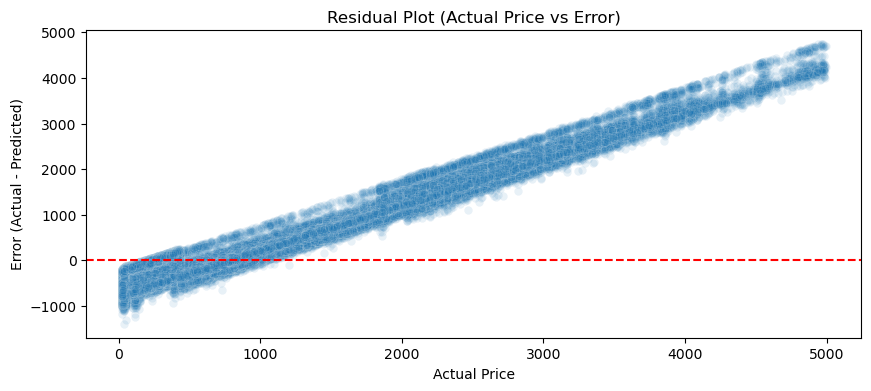

<Figure size 1000x800 with 0 Axes>

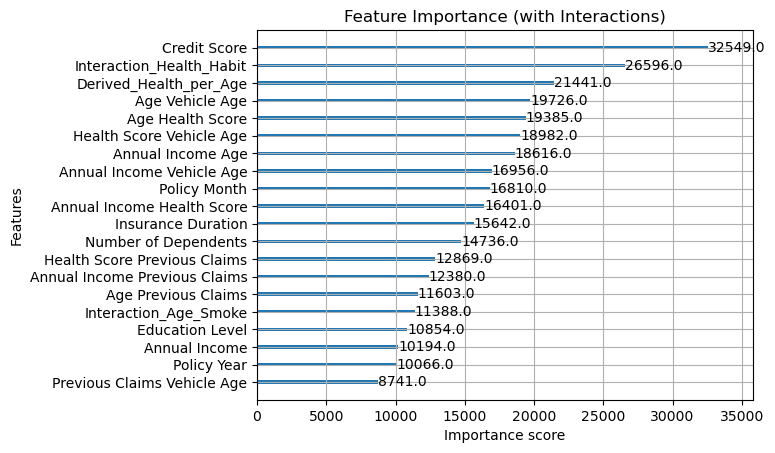

In [9]:
# 3. 평가
y_pred_log_deep = model_deep.predict(X_val_all)
y_pred_real_deep = np.expm1(y_pred_log_deep)
y_val_real = np.expm1(y_val)

mae_deep = mean_absolute_error(y_val_real, y_pred_real_deep)
r2_deep = r2_score(y_val_real, y_pred_real_deep)

print(f"\n[Deep Model Results]")
print(f"MAE: {mae_deep:.4f}")
print(f"R2 : {r2_deep:.4f}")

residuals = y_val_real - y_pred_real_deep
plt.figure(figsize=(10, 4))
sns.scatterplot(x=y_val_real, y=residuals, alpha=0.1)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot (Actual Price vs Error)')
plt.xlabel('Actual Price')
plt.ylabel('Error (Actual - Predicted)')
plt.show()


# 변수 중요도 (Top 20)
# Numpy로 학습하면 이름이 없으므로, 직접 매핑해서 그려야 함
# 여기선 간단하게 인덱스로 보거나, F-score 맵을 만들 수 있음
# 편의상 model 자체 plot_importance는 feature name이 없으면 f0, f1...으로 나옴
plt.figure(figsize=(10, 8))
# feature name 강제 주입 (가능한 경우)
model_deep.get_booster().feature_names = all_feature_names
plot_importance(model_deep, max_num_features=20)
plt.title("Feature Importance (with Interactions)")
plt.show()